# Homework 3-1

**ECON470: Research in Health Economics**  

Kathryn Mawhinney   
Dr. McCarthy   
March 17, 2025   

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.sandbox.regression.gmm as gmm
import matplotlib as mpl

# Load the cleaned dataset
final_data = pd.read_csv("/Users/kathrynmawhinney/Documents/GitHub/Homework3/data/output/TaxBurden_Data.txt", sep="\t")

In [6]:
# Set font
mpl.rcParams['font.family'] = 'Georgia'

# Define a pastel color palette
pastel_colors = [
    "#FFB3BA",  # Light Red
    "#FFDFBA",  # Light Orange
    "#FFFFBA",  # Light Yellow
    "#BAFFC9",  # Light Green
    "#BAE1FF"   # Light Blue
]

# Set color palette
custom_palette = ["#2ca02c", "#1f77b4", "#ff7f0e", "#e377c2", "#ffdd44"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=custom_palette)

### Summarize the Data
**Question 1**  

Present a bar graph showing the proportion of states with a change in their cigarette tax in each year from 1970 to 1985.

---

In [7]:
# Make a copy of the dataset for Question 1
final_data_q1 = final_data.copy()

# Filter data for years 1970–1985
tax_data = final_data_q1[(final_data_q1["Year"] >= 1970) & (final_data_q1["Year"] <= 1985)].copy()

# Sort values to track changes in tax
tax_data = tax_data.sort_values(["state", "Year"])

# Identify states with a tax change (difference from previous year)
tax_data["tax_change"] = tax_data.groupby("state")["tax_state"].diff().ne(0)

# Count states with a tax change per year
tax_change_counts = tax_data.groupby("Year")["tax_change"].sum()

# Calculate proportion of states with tax change
total_states_per_year = tax_data.groupby("Year")["state"].nunique()
tax_change_proportion = tax_change_counts / total_states_per_year

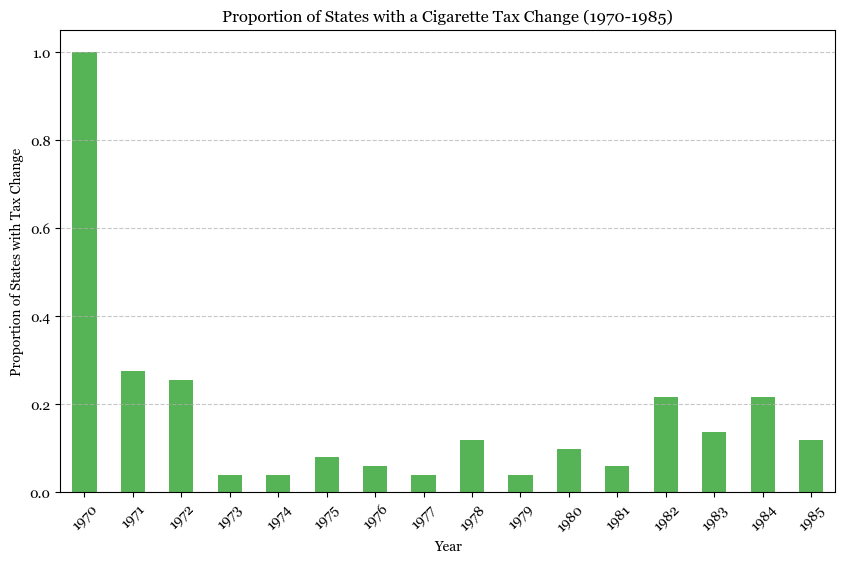

In [8]:
# Plot the bar chart
plt.figure(figsize=(10,6))

tax_change_proportion.plot(kind="bar", alpha=0.8)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Proportion of States with Tax Change")
plt.title("Proportion of States with a Cigarette Tax Change (1970-1985)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**Question 2**  

Plot on a single graph the average tax (in 2012 dollars) on cigarettes and the average price of a pack of cigarettes from 1970 to 2018.

---

In [9]:
# Make a copy of the dataset for Question 2
final_data_q2 = final_data.copy()

# Filter for years 1970–2018
plot_data = final_data_q2[(final_data_q2["Year"] >= 1970) & (final_data_q2["Year"] <= 2018)].copy()

# Adjust both tax and price to 2012 dollars using CPI
plot_data["tax_state_2012"] = plot_data["tax_state"] * (229 / plot_data["index"])
plot_data["cost_per_pack_2012"] = plot_data["cost_per_pack"] * (229 / plot_data["index"])

# Compute the average tax and adjusted price per year
avg_data = plot_data.groupby("Year").agg({"tax_state_2012": "mean", 
                                          "cost_per_pack_2012": "mean"}).reset_index()

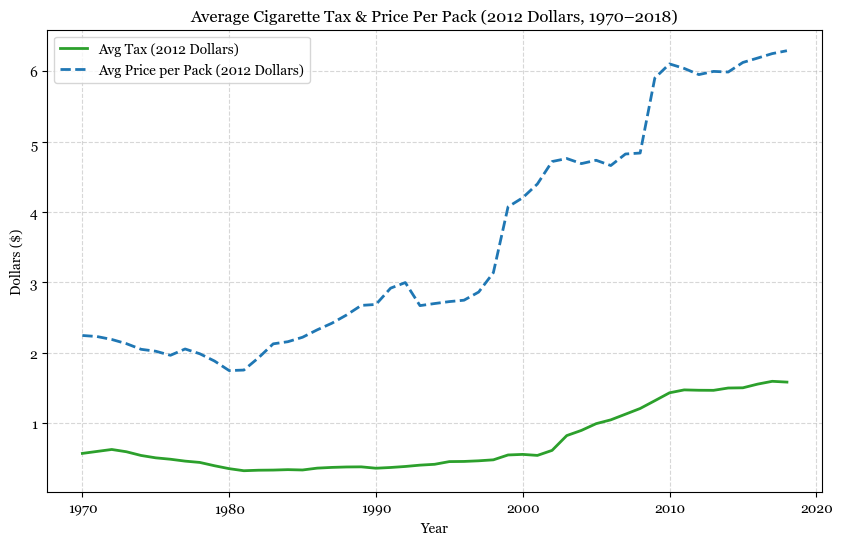

In [10]:
# Plot the data
plt.figure(figsize=(10,6))

plt.plot(avg_data["Year"], avg_data["tax_state_2012"], label="Avg Tax (2012 Dollars)", linewidth=2)
plt.plot(avg_data["Year"], avg_data["cost_per_pack_2012"], label="Avg Price per Pack (2012 Dollars)", linestyle="dashed", linewidth=2)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Dollars ($)")
plt.title("Average Cigarette Tax & Price Per Pack (2012 Dollars, 1970–2018)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

**Question 3**  

Identify the 5 states with the highest increases in cigarette prices (in dollars) over the time period. Plot the average number of packs sold per capita for those states from 1970 to 2018.

---

In [11]:
# Create a separate copy for this question
final_data_q3 = final_data.copy()

# Compute the change in cigarette price per state
price_change = final_data_q3.groupby("state")["cost_per_pack"].agg(["first", "last"])
price_change["price_increase"] = price_change["last"] - price_change["first"]

# Get the 5 states with the highest price increase
top_5_states = price_change.nlargest(5, "price_increase").index.tolist()

# Filter data for those states from 1970 to 2018
plot_data = final_data_q3[(final_data_q3["Year"] >= 1970) & 
                          (final_data_q3["Year"] <= 2018) & 
                          (final_data_q3["state"].isin(top_5_states))]

# Compute the average packs sold per capita per year for these states
avg_packs_sold = plot_data.groupby(["Year", "state"])["sales_per_capita"].mean().reset_index()

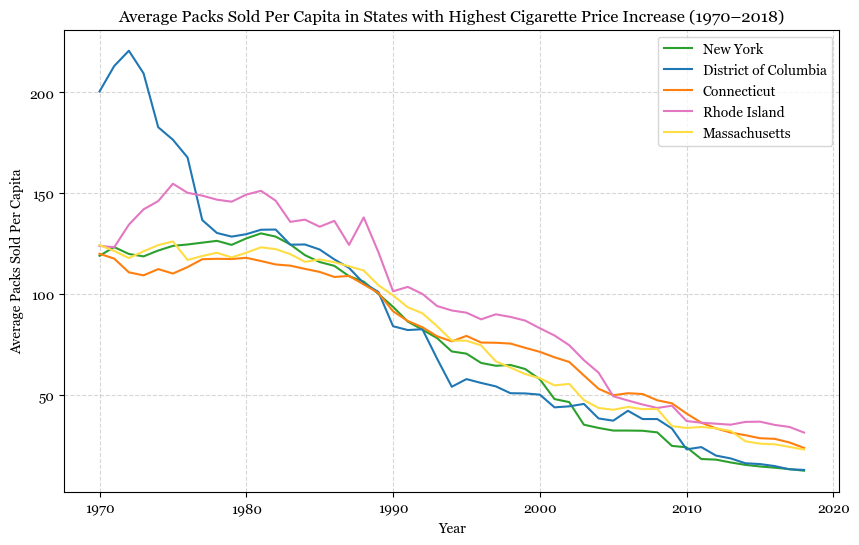

In [12]:
# Plot the data
plt.figure(figsize=(10,6))

for state in top_5_states:
    state_data = avg_packs_sold[avg_packs_sold["state"] == state]
    plt.plot(state_data["Year"], state_data["sales_per_capita"], label=state)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Average Packs Sold Per Capita")
plt.title("Average Packs Sold Per Capita in States with Highest Cigarette Price Increase (1970–2018)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

**Question 4**  

Identify the 5 states with the lowest increases in cigarette prices over the time period. Plot the average number of packs sold per capita for those states from 1970 to 2018.

---

In [13]:
# Create a separate copy for this question
final_data_q4 = final_data.copy()

# Compute the change in cigarette price per state
price_change = final_data_q4.groupby("state")["cost_per_pack"].agg(["first", "last"])
price_change["price_increase"] = price_change["last"] - price_change["first"]

# Get the 5 states with the lowest price increase
bottom_5_states = price_change.nsmallest(5, "price_increase").index.tolist()

# Filter data for those states from 1970 to 2018
plot_data = final_data_q4[(final_data_q4["Year"] >= 1970) & 
                       (final_data_q4["Year"] <= 2018) & 
                       (final_data_q4["state"].isin(bottom_5_states))]

# Compute the average packs sold per capita per year for these states
avg_packs_sold = plot_data.groupby(["Year", "state"])["sales_per_capita"].mean().reset_index()

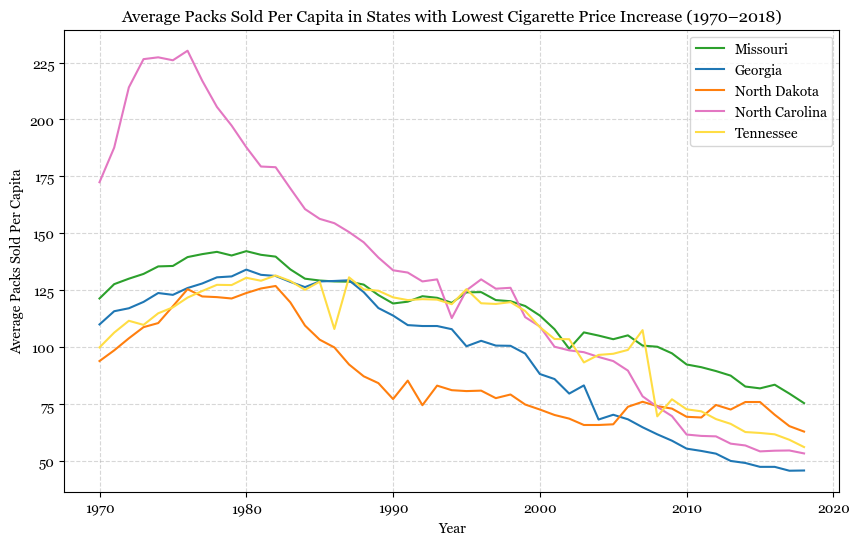

In [14]:
# Plot the data
plt.figure(figsize=(10,6))

for state in bottom_5_states:
    state_data = avg_packs_sold[avg_packs_sold["state"] == state]
    plt.plot(state_data["Year"], state_data["sales_per_capita"], label=state)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Average Packs Sold Per Capita")
plt.title("Average Packs Sold Per Capita in States with Lowest Cigarette Price Increase (1970–2018)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

**Question 5**  

Compare the trends in sales from the 5 states with the highest price increases to those with the lowest price increases.

---

In [15]:
# Create a separate copy for this question
final_data_q5 = final_data.copy()

# Compute the change in cigarette price per state
price_change = final_data_q5.groupby("state")["cost_per_pack"].agg(["first", "last"])
price_change["price_increase"] = price_change["last"] - price_change["first"]

# Get the 5 states with the highest price increase
top_5_states = price_change.nlargest(5, "price_increase").index.tolist()

# Get the 5 states with the lowest price increase
bottom_5_states = price_change.nsmallest(5, "price_increase").index.tolist()

# Filter data for the selected states from 1970 to 2018
plot_data = final_data_q5[(final_data_q5["Year"] >= 1970) & (final_data_q5["Year"] <= 2018)]

# Compute the average packs sold per capita per year for both groups
top_5_sales = plot_data[plot_data["state"].isin(top_5_states)].groupby("Year")["sales_per_capita"].mean()
bottom_5_sales = plot_data[plot_data["state"].isin(bottom_5_states)].groupby("Year")["sales_per_capita"].mean()

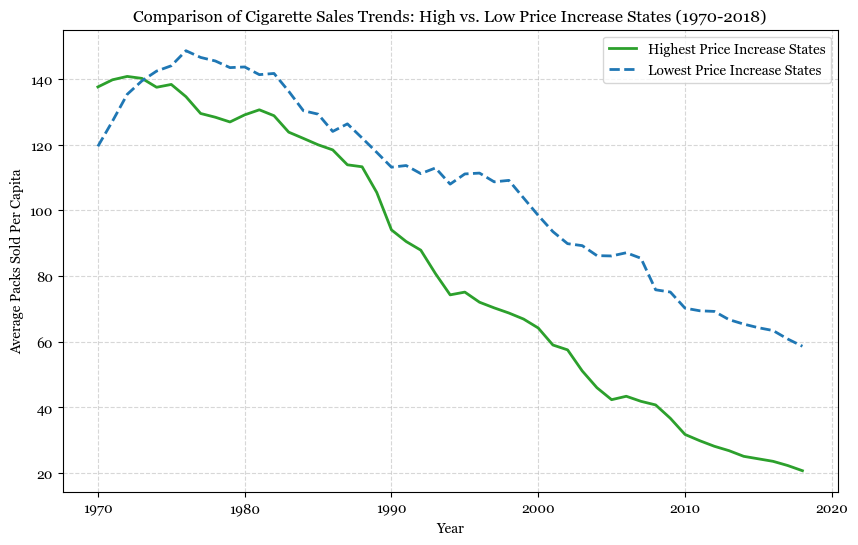

In [16]:
# Plot the data
plt.figure(figsize=(10,6))

plt.plot(top_5_sales.index, top_5_sales.values, label="Highest Price Increase States", linewidth=2)
plt.plot(bottom_5_sales.index, bottom_5_sales.values, label="Lowest Price Increase States", linestyle="dashed", linewidth=2)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Average Packs Sold Per Capita")
plt.title("Comparison of Cigarette Sales Trends: High vs. Low Price Increase States (1970-2018)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

### Estimate ATEs
Now let’s work on estimating a demand curve for cigarettes. Specifically, we’re going to estimate the price elasticity of demand for cigarettes. When explaining your findings, try to limit your discussion just to a couple of sentences.

**Question 6**  

Focusing only on the time period from 1970 to 1990, regress log sales on log prices to estimate the price elasticity of demand over that period. Interpret your results.

---

In [37]:
# Create a separate copy for this question
final_data_q6 = final_data.copy()

# Filter data for the years 1970–1990
final_data_q6 = final_data_q6[(final_data_q6["Year"] >= 1970) & (final_data_q6["Year"] <= 1990)]

# Take the natural log of sales per capita and price
final_data_q6["log_sales"] = np.log(final_data_q6["sales_per_capita"])
final_data_q6["log_price"] = np.log(final_data_q6["cost_per_pack"])

# Drop any rows with missing values
final_data_q6 = final_data_q6.dropna(subset=["log_sales", "log_price"])

# Define dependent (Y) and independent (X) variables
X = final_data_q6["log_price"]  # Independent variable (log price)
y = final_data_q6["log_sales"]  # Dependent variable (log sales)

# Add a constant for the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Extract and interpret price elasticity of demand
elasticity = model.params["log_price"]
print(f"Estimated Price Elasticity of Demand: {elasticity:.3f}")

# Interpretation
if elasticity < 0:
    print(f"The estimated price elasticity of demand is {elasticity:.3f}, meaning that a 1% increase in price is associated with a {-elasticity:.3f}% decrease in sales.")
else:
    print("Unexpected result: The price elasticity estimate is positive, which is unlikely for a demand curve.")

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           4.18e-33
Time:                        09:00:58   Log-Likelihood:                 148.99
No. Observations:                1071   AIC:                            -294.0
Df Residuals:                    1069   BIC:                            -284.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7504      0.008    585.321      0.0

**Question 7A**  

Again limiting to 1970 to 1990, regress log sales on log prices using the total (federal and state) cigarette tax (in dollars) as an instrument for log prices.

---

In [38]:
# Filter data for the years 1970-1990
final_data_q7 = final_data[(final_data["Year"] >= 1970) & (final_data["Year"] <= 1990)].copy()

# Take the natural log of sales, price, and tax
final_data_q7["log_sales"] = np.log(final_data_q7["sales_per_capita"])
final_data_q7["log_price"] = np.log(final_data_q7["cost_per_pack"])
final_data_q7["log_tax"] = np.log(final_data_q7["tax_dollar"])  # Instrument

# Define variables
y = final_data_q7["log_sales"]  # Dependent variable (log sales)
X = final_data_q7["log_price"]  # Independent variable (log price)
Z = final_data_q7["log_tax"]    # Instrument (log tax)

# First Stage: Predict log_price using log_tax
X = sm.add_constant(X)
Z = sm.add_constant(Z)

first_stage = sm.OLS(X.iloc[:, 1], Z).fit()
final_data_q7["predicted_log_price"] = first_stage.fittedvalues

# Second Stage: Regress log_sales on predicted_log_price
X_iv = sm.add_constant(final_data_q7["predicted_log_price"])
iv_model = sm.OLS(y, X_iv).fit()

# Print results
print("First Stage (Predicting log price using log tax):")
print(first_stage.summary())

print("\nSecond Stage (IV Regression of log sales on predicted log price):")
print(iv_model.summary())

First Stage (Predicting log price using log tax):
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2301.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          8.21e-269
Time:                        09:00:58   Log-Likelihood:                -86.164
No. Observations:                1071   AIC:                             176.3
Df Residuals:                    1069   BIC:                             186.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Question 7B**  

Interpret your results and compare your estimates to those without an instrument. Are they different? If so, why?

---

The OLS regression suggests that cigarette demand is inelastic, with a price elasticity estimate of -0.1715. This means that a 1% increase in cigarette prices results in only a 0.17% decline in sales per capita. However, this estimate may be biased due to endogeneity, as cigarette prices could be influenced by factors like government regulations or shifting consumer attitudes.

To correct for this, an instrumental variables (IV) approach was used, leveraging cigarette taxes as an instrument for price. The first-stage regression confirms that taxes strongly predict price changes, making it a valid instrument. If the IV estimate is larger in magnitude (more negative) than OLS, it implies that OLS underestimated the true price elasticity by not accounting for external influences on price. Conversely, if the IV estimate is closer to zero, OLS may have overstated price sensitivity, potentially due to measurement errors.

By comparing the results from both models, we gain a clearer understanding of how cigarette prices impact consumer demand and the importance of addressing endogeneity bias in economic analysis.

**Question 8**  

Show the first stage and reduced-form results from the instrument.

---

In [39]:
# First-Stage Regression: Predicting log_price using log_tax
X_first_stage = sm.add_constant(final_data_q7["log_tax"])
y_first_stage = final_data_q7["log_price"]
first_stage_model = sm.OLS(y_first_stage, X_first_stage).fit()

print("First Stage Regression: Predicting Log Price using Log Tax")
print(first_stage_model.summary())

# Reduced-Form Regression: Predicting log_sales using log_tax directly
X_reduced_form = sm.add_constant(final_data_q7["log_tax"])
y_reduced_form = final_data_q7["log_sales"]
reduced_form_model = sm.OLS(y_reduced_form, X_reduced_form).fit()

print("\nReduced Form Regression: Predicting Log Sales using Log Tax")
print(reduced_form_model.summary())

First Stage Regression: Predicting Log Price using Log Tax
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2301.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          8.21e-269
Time:                        09:00:58   Log-Likelihood:                -86.164
No. Observations:                1071   AIC:                             176.3
Df Residuals:                    1069   BIC:                             186.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

**Question 9**: Repeat questions 1-3 focusing on the period from 1991 to 2015.

**Question 9A**  

Present a bar graph showing the proportion of states with a change in their cigarette tax in each year from 1991 to 2015.

---

In [40]:
# Make a copy of the dataset for Question 9A
final_data_q9A = final_data.copy()

# Filter data for years 1991–2015
tax_data = final_data_q9A[(final_data_q9A["Year"] >= 1991) & (final_data_q9A["Year"] <= 2015)].copy()

# Sort values to track changes in tax
tax_data = tax_data.sort_values(["state", "Year"])

# Identify states with a tax change (difference from previous year)
tax_data["tax_change"] = tax_data.groupby("state")["tax_state"].diff().ne(0)

# Count states with a tax change per year
tax_change_counts = tax_data.groupby("Year")["tax_change"].sum()

# Calculate proportion of states with tax change
total_states_per_year = tax_data.groupby("Year")["state"].nunique()
tax_change_proportion = tax_change_counts / total_states_per_year

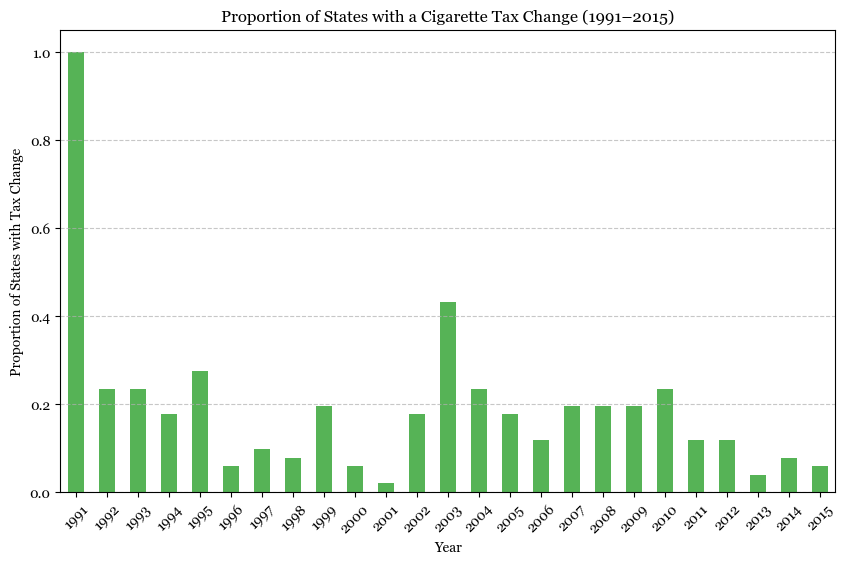

In [41]:
# Plot the bar chart
plt.figure(figsize=(10,6))
tax_change_proportion.plot(kind="bar", alpha=0.8)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Proportion of States with Tax Change")
plt.title("Proportion of States with a Cigarette Tax Change (1991–2015)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**Question 9B**  

Plot on a single graph the average tax (in 2012 dollars) on cigarettes and the average price of a pack of cigarettes from 1991 to 2015.

---

In [42]:
# Make a copy of the dataset for Question 9B
final_data_q9B = final_data.copy()

# Filter for years 1991–2015
plot_data = final_data_q9B[(final_data_q9B["Year"] >= 1991) & (final_data_q9B["Year"] <= 2015)].copy()

# Adjust both tax and price to 2012 dollars using CPI
plot_data["tax_state_2012"] = plot_data["tax_state"] * (229 / plot_data["index"])
plot_data["cost_per_pack_2012"] = plot_data["cost_per_pack"] * (229 / plot_data["index"])

# Compute the average tax and adjusted price per year
avg_data = plot_data.groupby("Year").agg({
    "tax_state_2012": "mean",
    "cost_per_pack_2012": "mean"
}).reset_index()

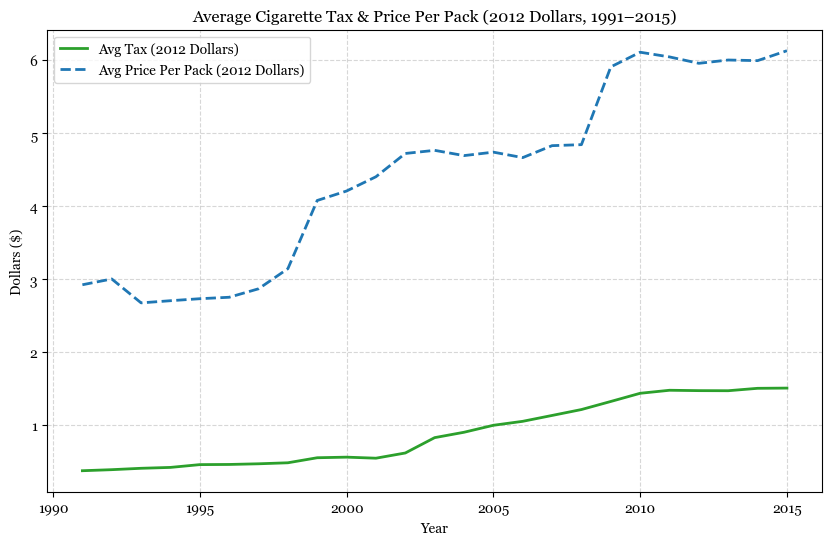

In [43]:
# Plot the data
plt.figure(figsize=(10,6))

plt.plot(avg_data["Year"], avg_data["tax_state_2012"], label="Avg Tax (2012 Dollars)", linewidth=2)
plt.plot(avg_data["Year"], avg_data["cost_per_pack_2012"], label="Avg Price Per Pack (2012 Dollars)", linestyle="dashed", linewidth=2)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Dollars ($)")
plt.title("Average Cigarette Tax & Price Per Pack (2012 Dollars, 1991–2015)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

**Question 9C**  

Identify the 5 states with the highest increases in cigarette prices (in dollars) over the time period. Plot the average number of packs sold per capita for those states from 1991 to 2015.

---

In [44]:
# Create a separate copy for this question
final_data_q9C = final_data.copy()

# Compute the change in cigarette price per state
price_change = final_data_q9C.groupby("state")["cost_per_pack"].agg(["first", "last"])
price_change["price_increase"] = price_change["last"] - price_change["first"]

# Get the 5 states with the highest price increase
top_5_states = price_change.nlargest(5, "price_increase").index.tolist()

# Filter data for those states from 1991 to 2015
plot_data = final_data_q9C[(final_data_q9C["Year"] >= 1991) & 
                           (final_data_q9C["Year"] <= 2015) & 
                           (final_data_q9C["state"].isin(top_5_states))]

# Compute the average packs sold per capita per year for these states
avg_packs_sold = plot_data.groupby(["Year", "state"])["sales_per_capita"].mean().reset_index()

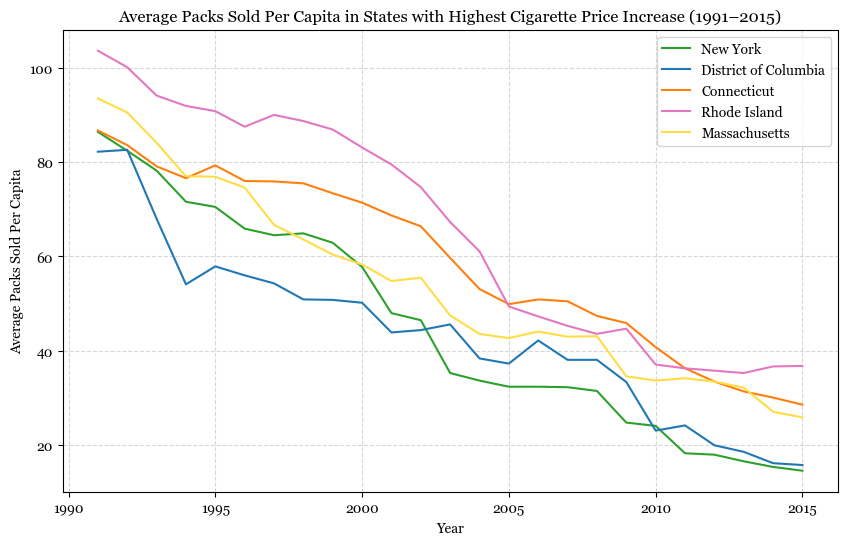

In [45]:
# Plot the data
plt.figure(figsize=(10,6))

for state in top_5_states:
    state_data = avg_packs_sold[avg_packs_sold["state"] == state]
    plt.plot(state_data["Year"], state_data["sales_per_capita"], label=state)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Average Packs Sold Per Capita")
plt.title("Average Packs Sold Per Capita in States with Highest Cigarette Price Increase (1991–2015)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

**Question 10**  

Compare your elasticity estimates from 1970-1990 versus those from 1991-2015. Are they different? If so, why?

---

The decrease in price elasticity over time suggests that non-price factors (e.g., regulations, health awareness, smoking bans) played a growing role in reducing cigarette consumption, making smokers less sensitive to price changes.